In [1]:
"Part 2 - Data Understanding"

'Part 2 - Data Understanding'

In [2]:
import pyspark
from pyspark.sql.functions import col, count, isnan, when
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName("PySpark in Jupyter") \
    .getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/19 10:23:34 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
df = spark.read.csv('Dataset/dementia_data.csv', header=True, inferSchema=True)

# 2.2 Describe Data

In [4]:
df.printSchema()

root
 |-- Diabetic: integer (nullable = true)
 |-- AlcoholLevel: double (nullable = true)
 |-- HeartRate: integer (nullable = true)
 |-- BloodOxygenLevel: double (nullable = true)
 |-- BodyTemperature: double (nullable = true)
 |-- Weight: double (nullable = true)
 |-- MRI_Delay: double (nullable = true)
 |-- Prescription: string (nullable = true)
 |-- Dosage in mg: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Education_Level: string (nullable = true)
 |-- Dominant_Hand: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Family_History: string (nullable = true)
 |-- Smoking_Status: string (nullable = true)
 |-- APOE_ε4: string (nullable = true)
 |-- Physical_Activity: string (nullable = true)
 |-- Depression_Status: string (nullable = true)
 |-- Cognitive_Test_Scores: integer (nullable = true)
 |-- Medication_History: string (nullable = true)
 |-- Nutrition_Diet: string (nullable = true)
 |-- Sleep_Quality: string (nullable = true)
 |-- Chronic_Hea

In [5]:
def display_spark_dataframe(spark_df, num_rows=10):
    # Collect rows to the driver (be careful with large data)
    rows = spark_df.take(num_rows)
    
    # Extract the schema
    columns = spark_df.columns
    
    # Display the rows in a tabular format
    html = "<table>"
    # Add the header
    html += "<tr>" + "".join([f"<th>{col}</th>" for col in columns]) + "</tr>"
    # Add the rows
    for row in rows:
        html += "<tr>" + "".join([f"<td>{cell}</td>" for cell in row]) + "</tr>"
    html += "</table>"
    
    # Display as HTML
    from IPython.core.display import HTML
    display(HTML(html))

# Display the first 10 rows of the DataFrame
display_spark_dataframe(df, 10)

Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,Education_Level,Dominant_Hand,Gender,Family_History,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
1,0.084973629,98,96.23074296,36.22485168,57.56397754,36.42102798,None,None,60,Primary School,Left,Female,No,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
0,0.016972773,78,93.03212234,36.18387372,56.83233533,31.15763321,Galantamine,12.0,61,Secondary School,Right,Male,No,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
0,0.00900025,89,93.56650425,37.32632078,59.75906557,37.64043545,None,None,69,Primary School,Right,Male,Yes,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
0,0.08643726,60,93.90650966,37.03061991,58.26647094,50.67399181,Donepezil,23.0,78,Secondary School,Left,Female,Yes,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
1,0.150747307,67,97.50899362,36.06212064,67.70502731,27.81060082,Memantine,20.0,77,Secondary School,Right,Male,Yes,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1
1,0.114027805,194,94.54675449,36.67807148,66.59232945,21.15486333,Rivastigmine,1.5,67,None,Left,Male,No,Former Smoker,Positive,Mild Activity,Yes,1,No,Low-Carb Diet,Poor,Diabetes,1
1,0.016193782,90,96.42336125,37.02463024,83.97655278,11.35061188,Donepezil,10.0,87,Primary School,Right,Male,No,Never Smoked,Positive,Mild Activity,No,7,No,Mediterranean Diet,Poor,Diabetes,1
0,0.161158077,20,92.00736986,36.05029416,69.65356381,30.33941341,None,None,66,Secondary School,Right,Female,No,Former Smoker,Negative,Mild Activity,No,9,Yes,Low-Carb Diet,Poor,Hypertension,0
0,0.015754249,69,99.85948977,36.95525851,53.72507846,36.62968689,None,None,66,Secondary School,Right,Female,No,Former Smoker,Positive,Mild Activity,No,10,Yes,Mediterranean Diet,Poor,None,0
1,0.097339537,64,90.31906814,36.39628625,58.36669799,49.17575751,Rivastigmine,3.0,87,Diploma/Degree,Left,Female,No,Former Smoker,Positive,Sedentary,Yes,7,Yes,Balanced Diet,Good,Diabetes,1


In [6]:
def spark_info(df):
    # Get the schema of the DataFrame
    schema = df.schema
    
    # Create a list to hold column information
    columns_info = []
    
    # Iterate through the schema to get column information
    for field in schema:
        column_name = field.name
        column_type = field.dataType.simpleString()
        
        # Count non-null values
        non_null_count = df.filter(col(column_name).isNotNull()).count()
        
        # Count null values
        null_count = df.filter(col(column_name).isNull() | isnan(col(column_name))).count()
        
        columns_info.append((column_name, column_type, non_null_count, null_count))
    
    # Display the DataFrame schema and summary
    total_rows = df.count()
    total_columns = len(schema)
    
    # Print the summary table
    print(f"DataFrame Summary:")
    print(f"{'Total Rows':<15}: {total_rows}")
    print(f"{'Total Columns':<15}: {total_columns}")
    print("\nDataFrame Schema:")
    print(f"{'Column':<20} {'Non-Null Count':<15} {'Null Count':<10} {'Dtype':<10}")
    print("-" * 60)
    for column_info in columns_info:
        print(f"{column_info[0]:<20} {column_info[2]:<15} {column_info[3]:<10} {column_info[1]:<10}")

# Call the function to describe the DataFrame
spark_info(df)

DataFrame Summary:
Total Rows     : 1000
Total Columns  : 24

DataFrame Schema:
Column               Non-Null Count  Null Count Dtype     
------------------------------------------------------------
Diabetic             1000            0          int       
AlcoholLevel         1000            0          double    
HeartRate            1000            0          int       
BloodOxygenLevel     1000            0          double    
BodyTemperature      1000            0          double    
Weight               1000            0          double    
MRI_Delay            1000            0          double    
Prescription         485             515        string    
Dosage in mg         485             515        double    
Age                  1000            0          int       
Education_Level      845             155        string    
Dominant_Hand        1000            0          string    
Gender               1000            0          string    
Family_History       1000        

In [7]:
# Show columns and their data types
df.printSchema()

root
 |-- Diabetic: integer (nullable = true)
 |-- AlcoholLevel: double (nullable = true)
 |-- HeartRate: integer (nullable = true)
 |-- BloodOxygenLevel: double (nullable = true)
 |-- BodyTemperature: double (nullable = true)
 |-- Weight: double (nullable = true)
 |-- MRI_Delay: double (nullable = true)
 |-- Prescription: string (nullable = true)
 |-- Dosage in mg: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Education_Level: string (nullable = true)
 |-- Dominant_Hand: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Family_History: string (nullable = true)
 |-- Smoking_Status: string (nullable = true)
 |-- APOE_ε4: string (nullable = true)
 |-- Physical_Activity: string (nullable = true)
 |-- Depression_Status: string (nullable = true)
 |-- Cognitive_Test_Scores: integer (nullable = true)
 |-- Medication_History: string (nullable = true)
 |-- Nutrition_Diet: string (nullable = true)
 |-- Sleep_Quality: string (nullable = true)
 |-- Chronic_Hea

# 2.3 Explore Data

In [8]:
# Group by the 'dementia' column and count the occurrences of each value
dementia_counts = df.groupBy('dementia').count()

# Show the counts
dementia_counts.show()


+--------+-----+
|dementia|count|
+--------+-----+
|       1|  485|
|       0|  515|
+--------+-----+



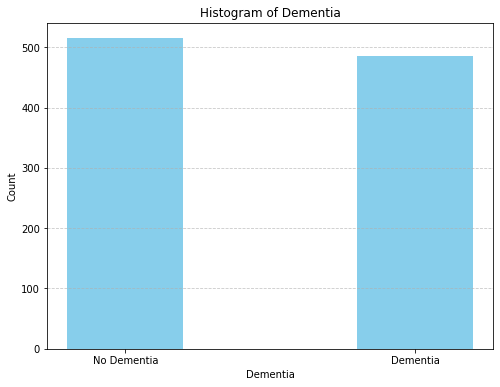

In [9]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Plot the histogram without using Pandas
plt.figure(figsize=(8, 6))

# Extract values from the PySpark DataFrame
dementia_counts_list = dementia_counts.collect()
dementia_values = [row['dementia'] for row in dementia_counts_list]
count_values = [row['count'] for row in dementia_counts_list]

# Plot the histogram
plt.bar(dementia_values, count_values, color='skyblue', width=0.4)

# Set x-axis ticks and labels
plt.xticks([0, 1], ['No Dementia', 'Dementia'])

# Set axis labels and title
plt.xlabel('Dementia')
plt.ylabel('Count')
plt.title('Histogram of Dementia')

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()



In [10]:
# Group by 'sleep_quality' and 'dementia' columns and count the occurrences of each combination
sleep_dementia_counts = df.groupBy('sleep_quality', 'dementia').count()

# Show the counts
sleep_dementia_counts.show()

+-------------+--------+-----+
|sleep_quality|dementia|count|
+-------------+--------+-----+
|         Poor|       1|  264|
|         Poor|       0|  270|
|         Good|       1|  221|
|         Good|       0|  245|
+-------------+--------+-----+



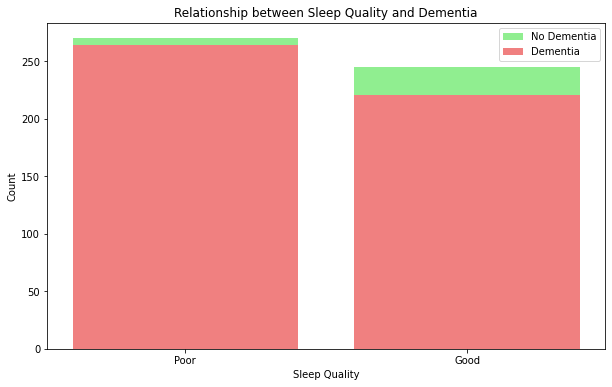

In [11]:
# Convert 'sleep_quality' and 'dementia' columns to strings for plotting
sleep_dementia_counts = sleep_dementia_counts.withColumn('sleep_quality', sleep_dementia_counts['sleep_quality'].cast('string'))
sleep_dementia_counts = sleep_dementia_counts.withColumn('dementia', sleep_dementia_counts['dementia'].cast('string'))

# Plot the histogram
plt.figure(figsize=(10, 6))

# Extract values from the PySpark DataFrame
sleep_dementia_counts_pd = sleep_dementia_counts.toPandas()

# Filter the DataFrame for 'dementia' values 0 and 1
dementia_0_counts = sleep_dementia_counts_pd[sleep_dementia_counts_pd['dementia'] == '0']
dementia_1_counts = sleep_dementia_counts_pd[sleep_dementia_counts_pd['dementia'] == '1']

# Plot bars for 'dementia' values 0 and 1
plt.bar(dementia_0_counts['sleep_quality'], dementia_0_counts['count'], color='lightgreen', label='No Dementia')
plt.bar(dementia_1_counts['sleep_quality'], dementia_1_counts['count'], color='lightcoral', label='Dementia')

# Set axis labels and title
plt.xlabel('Sleep Quality')
plt.ylabel('Count')
plt.title('Relationship between Sleep Quality and Dementia')

# Add legend
plt.legend()

# Show plot
plt.show()

In [12]:
# Replace null values in 'education_level' column with 'Unknown'
df = df.withColumn('education_level', when(df['education_level'].isNull(), 'Unknown').otherwise(df['education_level']))

In [13]:
# Group by 'education_level' and 'dementia' columns and count the occurrences of each combination
education_dementia_counts = df.groupBy('education_level', 'dementia').count()

In [14]:
# Convert 'education_level' and 'dementia' columns to strings for plotting
education_dementia_counts = education_dementia_counts.withColumn('education_level', education_dementia_counts['education_level'].cast('string'))
education_dementia_counts = education_dementia_counts.withColumn('dementia', education_dementia_counts['dementia'].cast('string'))

# Show the counts
education_dementia_counts.show()


+----------------+--------+-----+
| education_level|dementia|count|
+----------------+--------+-----+
|  Primary School|       1|  181|
|  Primary School|       0|  208|
|         Unknown|       0|   57|
|Secondary School|       1|  155|
|         Unknown|       1|   98|
|  Diploma/Degree|       1|   51|
|  Diploma/Degree|       0|  101|
|Secondary School|       0|  149|
+----------------+--------+-----+



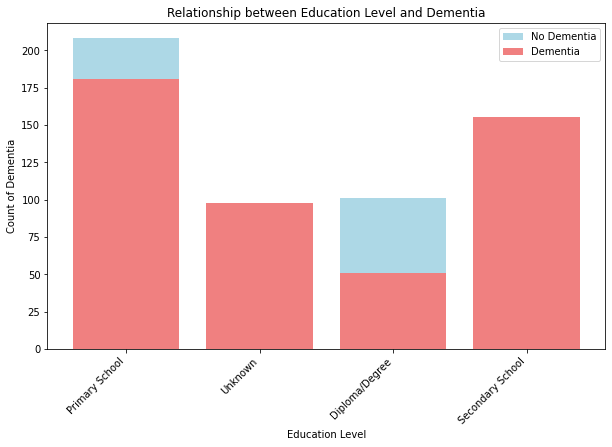

In [15]:
# Plot the histogram
plt.figure(figsize=(10, 6))

# Extract values from the PySpark DataFrame
education_dementia_counts_pd = education_dementia_counts.toPandas()

# Filter the DataFrame for 'dementia' values 0 and 1
dementia_0_counts = education_dementia_counts_pd[education_dementia_counts_pd['dementia'] == '0']
dementia_1_counts = education_dementia_counts_pd[education_dementia_counts_pd['dementia'] == '1']

# Plot bars for 'dementia' values 0 and 1
plt.bar(dementia_0_counts['education_level'], dementia_0_counts['count'], color='lightblue', label='No Dementia')
plt.bar(dementia_1_counts['education_level'], dementia_1_counts['count'], color='lightcoral', label='Dementia')

# Set axis labels and title
plt.xlabel('Education Level')
plt.ylabel('Count of Dementia')
plt.title('Relationship between Education Level and Dementia')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend()

# Show plot
plt.show()


# 2.4 Verify Data Quality

In [16]:
from pyspark.sql.functions import col
from pyspark.sql import functions as F

# we use Z-score to find outliers and extreme values

In [17]:
def count_outliers_iqr(df):
    # Define an empty dictionary to store the results
    results = {}
    
    # Loop through each numerical column in the DataFrame
    for column in df.columns:
        if df.select(column).dtypes[0][1] in ['int', 'bigint', 'float', 'double']:
            # Calculate quartiles for the column
            quartiles = df.approxQuantile(column, [0.25, 0.75], 0.01)
            q1 = quartiles[0]
            q3 = quartiles[1]
            
            # Calculate IQR for the column
            iqr = q3 - q1
            
            # Calculate lower and upper bounds for outliers
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            # Count the number of values less than the lower bound or greater than the upper bound
            count_outliers = df.filter((col(column) < lower_bound) | (col(column) > upper_bound)).count()
            
            # Count the number of values less than the lower bound or greater than the upper bound by 3*IQR
            count_extremes = df.filter((col(column) < (q1 - 3 * iqr)) | (col(column) > (q3 + 3 * iqr))).count()
            
            # Add the counts to the dictionary
            results[column] = (count_outliers, count_extremes)
    
    # Return the dictionary containing counts of outliers and extreme values for each column
    return results


In [18]:
# Count outliers and extreme values for each column using IQR method
outlier_counts_iqr = count_outliers_iqr(df)


In [24]:
# Display the header of the table
print("Column Name            | Outliers   | Extreme Values")
print("-------------------------------------------------")

# Display the counts of outliers and extreme values for each column using IQR method
for column, (outliers, extremes) in outlier_counts_iqr.items():
    print(f"{column: <22} | {outliers: <10} | {extremes: <13}")


Column Name            | Outliers   | Extreme Values
-------------------------------------------------
Diabetic               | 0          | 0            
AlcoholLevel           | 0          | 0            
HeartRate              | 9          | 6            
BloodOxygenLevel       | 0          | 0            
BodyTemperature        | 20         | 20           
Weight                 | 10         | 8            
MRI_Delay              | 0          | 0            
Dosage in mg           | 0          | 0            
Age                    | 11         | 6            
Cognitive_Test_Scores  | 0          | 0            
Dementia               | 0          | 0            


In [40]:
# Display the header of the table
print("Column Name               | Missing Values")
print("-------------------------------------")

# Loop through each column in the DataFrame
for column in df.columns:
    # Count the number of null values, empty strings, "Unknown", and "None" for the column
    count_missing = df.filter(
        (col(column).isNull()) |
        (col(column) == "") |
        (col(column) == "Unknown") |
        (col(column) == "None")
    ).count()
    
    # Add the count to the dictionary
    null_counts[column] = count_missing

# Display the counts of null values, empty strings, "Unknown", and "None" for each column
for column, count in null_counts.items():
    print(f"{column: <25} | {count: <13}")


Column Name               | Missing Values
-------------------------------------
Diabetic                  | 0            
AlcoholLevel              | 0            
HeartRate                 | 0            
BloodOxygenLevel          | 0            
BodyTemperature           | 0            
Weight                    | 0            
MRI_Delay                 | 0            
Prescription              | 515          
Dosage in mg              | 515          
Age                       | 0            
education_level           | 155          
Dominant_Hand             | 0            
Gender                    | 0            
Family_History            | 0            
Smoking_Status            | 0            
APOE_ε4                   | 0            
Physical_Activity         | 0            
Depression_Status         | 0            
Cognitive_Test_Scores     | 0            
Medication_History        | 0            
Nutrition_Diet            | 0            
Sleep_Quality             | 0        

In [ ]:
# Finish